In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import stats

survey_path = '../main_resources/hc_workers/clean_renamed_hcw_df.csv'
survey_data = pd.read_csv(survey_path,encoding="cp1252")
survey_data.head()

,date,age,gender,state,education_level,marital_status,tested_positive_self,tested_positive_ff,living_with,anxiety_diagnosed,...,feel_enthusiastic,feel_excited,feel_fatigued,feel_frightened,feel_furious,feel_gloomy,feel_inspired,feel_relaxed,feel_satisfied,ID
0,6/7/20 11:43,50-60,Male,Delhi,Post graduate,Married,No,No,Family,No,...,3,3,2,2,2,2,3,3,4,0
1,6/7/20 23:40,50-60,Male,Maharashtra,Post graduate,Married,No,No,Family,No,...,4,4,2,1,1,1,4,3,5,1
2,6/8/20 0:52,50-60,Male,Rajasthan,PhD,Married,No,Yes,Family,No,...,4,4,1,1,1,1,4,4,4,2
3,6/8/20 1:00,30-40,Male,Maharashtra,Graduate,Married,No,No,Family,No,...,5,5,1,1,1,1,5,4,5,3
4,6/8/20 8:36,50-60,Male,Maharashtra,Graduate,Married,No,No,Family,No,...,4,3,3,1,1,1,3,2,4,4


In [12]:
#build the family specific dataframe
family_anxiety_df = survey_data.loc[survey_data['living_with'] == 'Family']

family_anxiety_df.head()

,Unnamed: 0,date,age,gender,state,education_level,martial_status,tested_positive_self,tested_positive_ff,living_with,...,feel_enthusiastic,feel_excited,feel_fatigued,feel_frightened,feel_furious,feel_gloomy,feel_inspired,feel_relaxed,feel_satisfied,ID
0,0,6-7-2020 11:43:59,50-60,Male,Delhi,Post graduate,Married,No,No,Family,...,3.0,3.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,0
1,1,6-7-2020 23:40:05,50-60,Male,Maharashtra,Post graduate,Married,No,No,Family,...,4.0,4.0,2.0,1.0,1.0,1.0,4.0,3.0,5.0,1
2,2,6-8-2020 0:52:01,50-60,Male,Rajasthan,PhD,Married,No,Yes,Family,...,4.0,4.0,1.0,1.0,1.0,1.0,4.0,4.0,4.0,2
3,3,6-8-2020 1:00:52,30-40,Male,Maharashtra,Graduate,Married,No,No,Family,...,5.0,5.0,1.0,1.0,1.0,1.0,5.0,4.0,5.0,3
4,4,6-8-2020 8:36:49,50-60,Male,Maharashtra,Graduate,Married,No,No,Family,...,4.0,3.0,3.0,1.0,1.0,1.0,3.0,2.0,4.0,4


In [13]:
#build the family specific crosstab from the df
family_anxiety_scores = pd.crosstab(family_anxiety_df.job_description,family_anxiety_df.feel_anxious, margins=True,margins_name="Total")
family_anxiety_scores.head()

family_anxiety_scores

feel_anxious,1.0,2.0,3.0,4.0,5.0,Total
job_description,,,,,,
Consultant,11,13,8,2,0,34
Doctor,16,18,12,8,1,55
Grade four staff,0,0,4,0,0,4
Grade three staff,4,3,2,0,6,15
Middle management,16,4,7,1,7,35
Nursing staff,3,4,5,4,8,24
Top management,7,2,0,1,0,10
Total,57,44,38,16,22,177


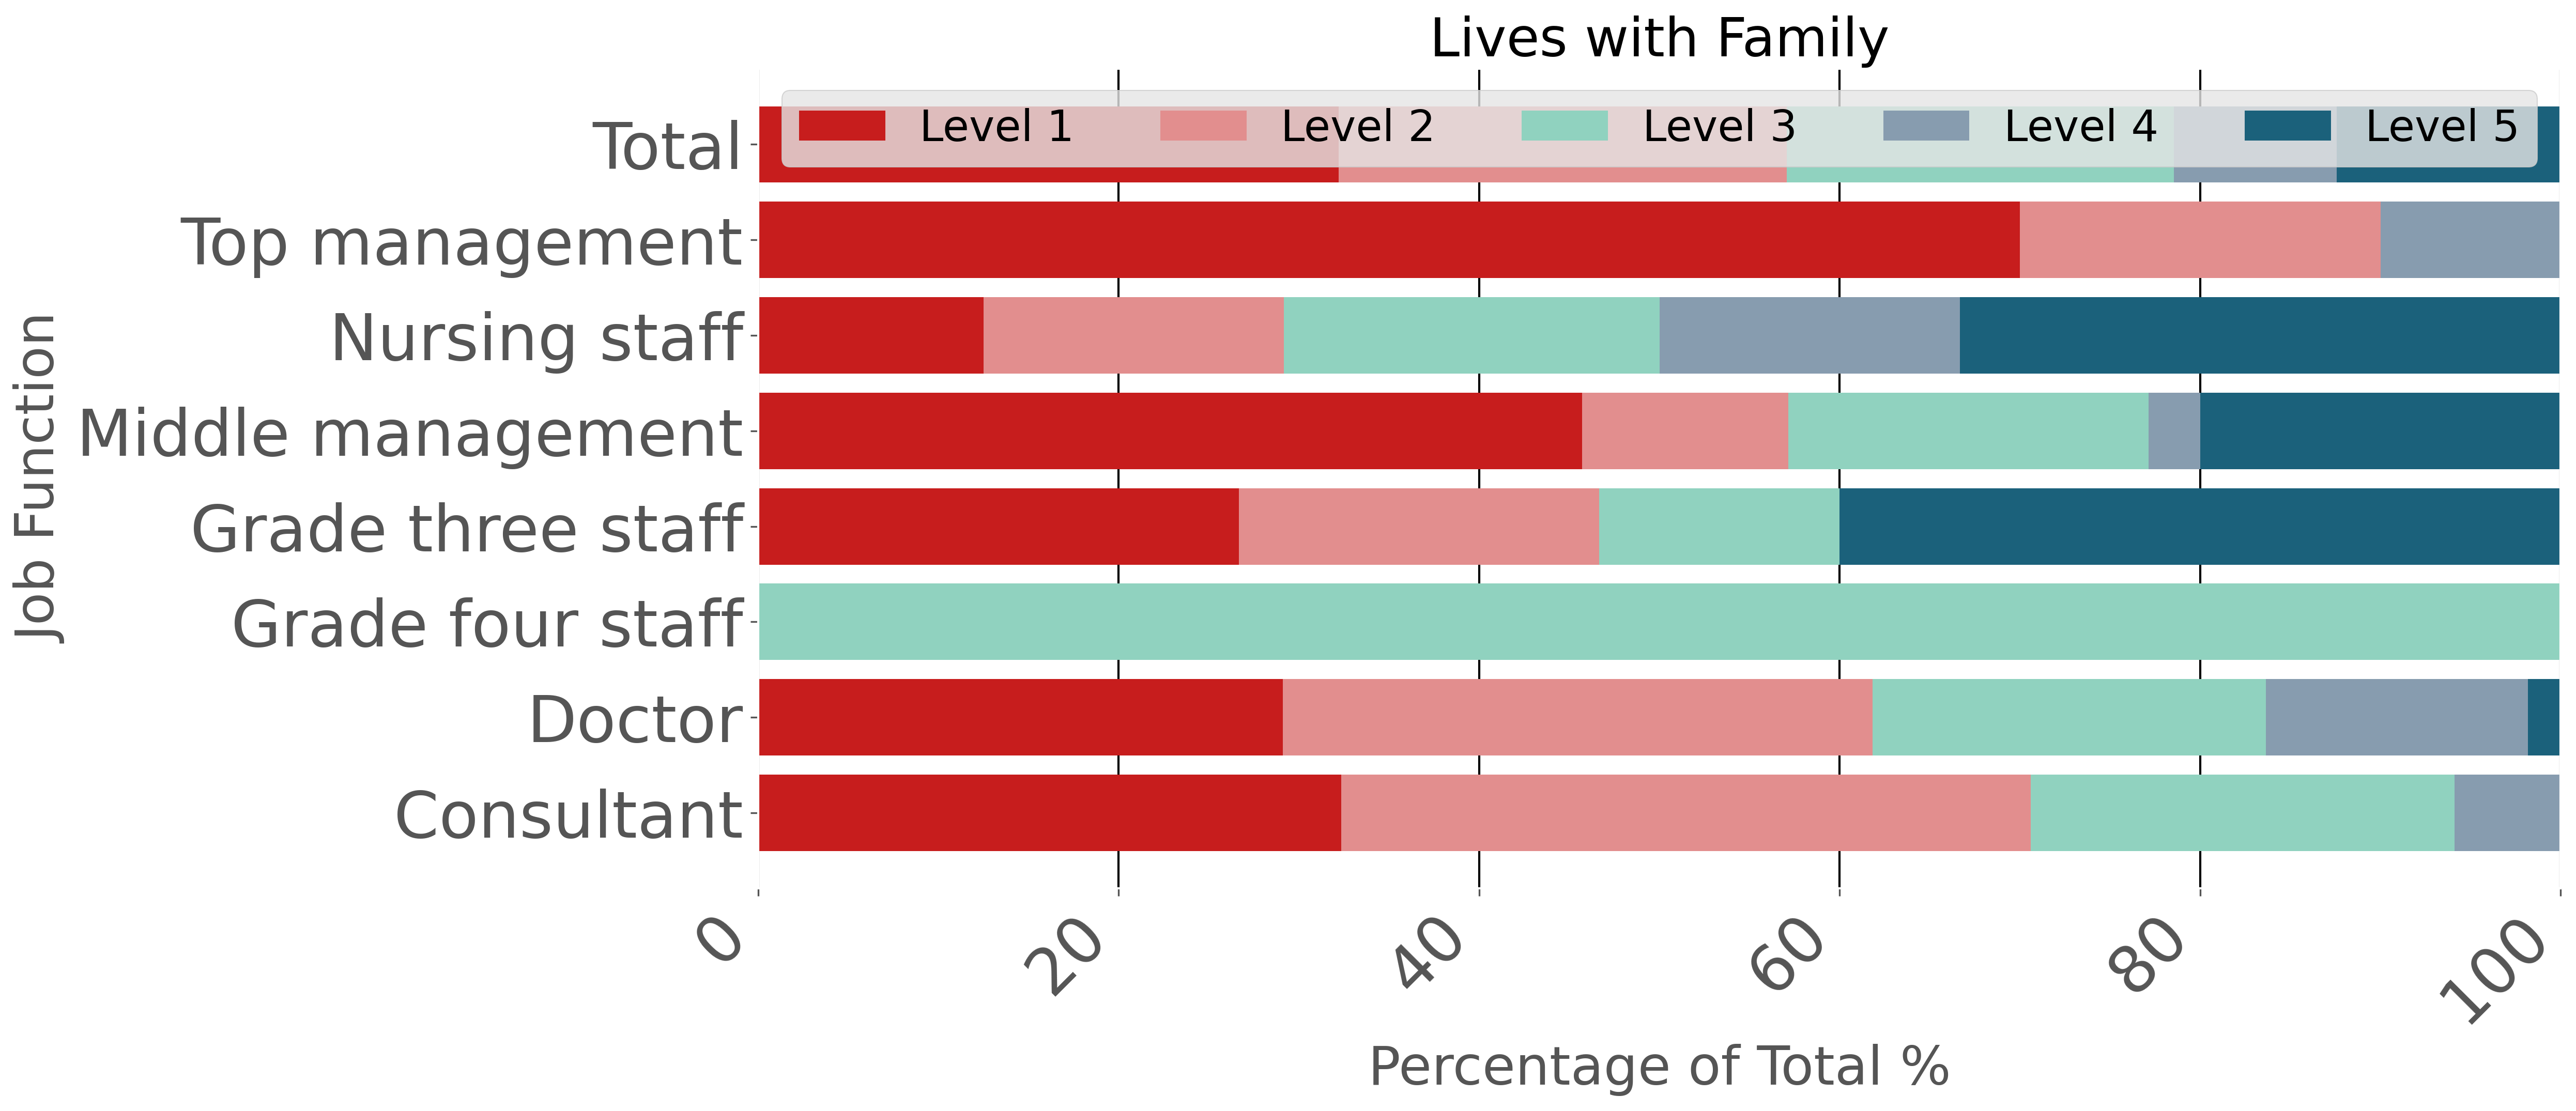

In [14]:
#plot family specific data
plt.style.use('ggplot')
plt.figure(figsize=(3,7), dpi=(300))

job_function = family_anxiety_scores.index
score_one = family_anxiety_scores[1.0]
score_two = family_anxiety_scores[2.0]
score_three = family_anxiety_scores[3.0]
score_four = family_anxiety_scores[4.0]
score_five = family_anxiety_scores[5.0]

index = [x for x, _ in enumerate(job_function)]

#calculate percentage of totals %

total = score_one + score_two + score_three + score_four + score_five
prop_one = np.true_divide(score_one,total)*100
prop_two = np.true_divide(score_two,total)*100
prop_three = np.true_divide(score_three,total)*100
prop_four = np.true_divide(score_four,total)*100
prop_five = np.true_divide(score_five,total)*100

plt.subplots_adjust(right=4)

#plot bars

plt.barh(index, prop_five, label='Level 5', color='#1b617b', left=prop_one+prop_two+prop_three+prop_four)
plt.barh(index, prop_four, label='Level 4', color='#879caf', left=prop_one+prop_two+prop_three)
plt.barh(index, prop_three, label='Level 3', color='#90d2bf', left=prop_one+prop_two)
plt.barh(index, prop_two, label='Level 2', color='#e28e8e', left=prop_one)
plt.barh(index, prop_one, label='Level 1', color='#c71d1d')


#set axis
plt.yticks(index,job_function)
plt.xlim=2.0

#format labeling

ax=plt.gca()
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.grid(color='black', linestyle='-', axis="x", linewidth=1)
ax.set_facecolor('white')
plt.tick_params(labelsize=30)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],fontsize="20",loc="upper center", ncol=len(family_anxiety_scores.columns))

plt.title("Lives with Family",fontsize="25")
plt.xlabel("Percentage of Total %",fontsize="25")
plt.ylabel("Job Function",fontsize="25")

#plt.legend(fontsize="30",loc="upper left", ncol=len(family_anxiety_scores.columns))


plt.show()


In [15]:
#build the non-family specific dataframe and respective crosstab

no_family_anxiety_df = survey_data.loc[survey_data['living_with'] != 'Family']

no_family_anxiety_df.head()

no_family_anxiety_scores = pd.crosstab(no_family_anxiety_df.job_description,no_family_anxiety_df.feel_anxious,margins=True, margins_name="Total")
no_family_anxiety_scores.reset_index()
no_family_anxiety_scores.head()

no_family_anxiety_scores

feel_anxious,1.0,2.0,3.0,4.0,5.0,Total
job_description,,,,,,
Consultant,2,0,0,0,0,2
Doctor,3,6,1,0,0,10
Grade four staff,1,0,0,0,0,1
Grade three staff,10,0,0,1,1,12
Middle management,1,1,3,0,0,5
Nursing staff,11,8,4,2,2,27
Top management,0,1,0,0,0,1
Total,28,16,8,3,3,58


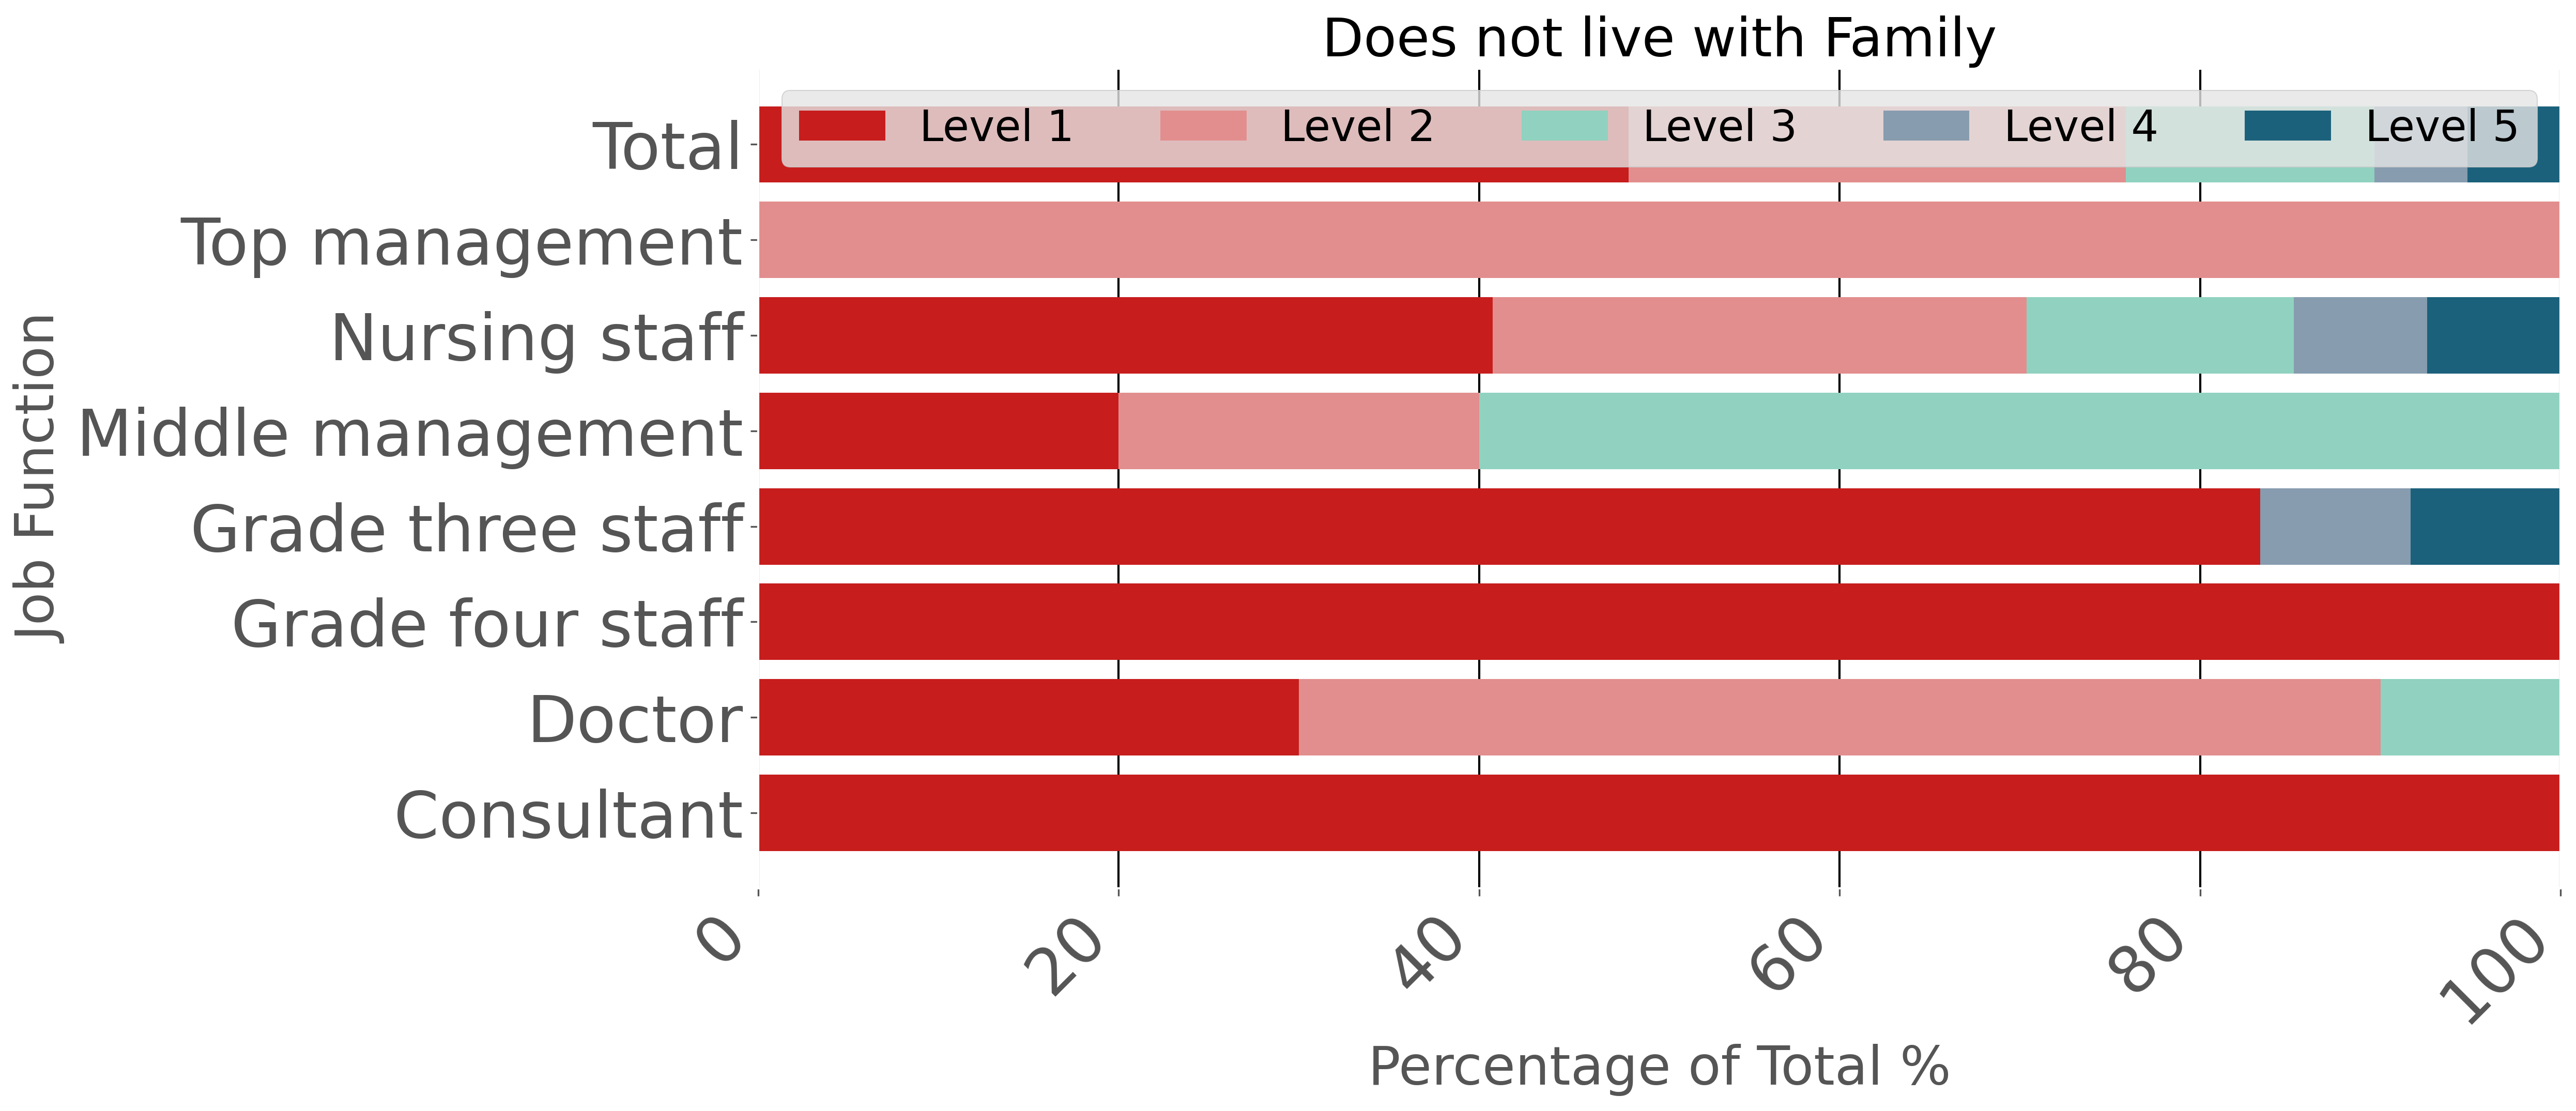

In [16]:
#plot non-family specific data

plt.style.use('ggplot')
plt.figure(figsize=(3,7), dpi=(300))

job_function = no_family_anxiety_scores.index
score_one_no = no_family_anxiety_scores[1.0]
score_two_no = no_family_anxiety_scores[2.0]
score_three_no = no_family_anxiety_scores[3.0]
score_four_no = no_family_anxiety_scores[4.0]
score_five_no = no_family_anxiety_scores[5.0]

index = [x for x, _ in enumerate(job_function)]

#calculate percentage of totals %

total = score_one_no + score_two_no + score_three_no + score_four_no + score_five_no
prop_one_no = np.true_divide(score_one_no,total)*100
prop_two_no = np.true_divide(score_two_no,total)*100
prop_three_no = np.true_divide(score_three_no,total)*100
prop_four_no = np.true_divide(score_four_no,total)*100
prop_five_no = np.true_divide(score_five_no,total)*100

plt.subplots_adjust(right=4)

#plot bars

plt.barh(index, prop_five_no, label='Level 5', color='#1b617b', left=prop_one_no+prop_two_no+prop_three_no+prop_four_no)
plt.barh(index, prop_four_no, label='Level 4', color='#879caf', left=prop_one_no+prop_two_no+prop_three_no)
plt.barh(index, prop_three_no, label='Level 3', color='#90d2bf', left=prop_one_no+prop_two_no)
plt.barh(index, prop_two_no, label='Level 2', color='#e28e8e', left=prop_one_no)
plt.barh(index, prop_one_no, label='Level 1', color='#c71d1d')


#set axis
plt.yticks(index,job_function)
plt.xlim=2.0

#format labeling

ax=plt.gca()
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.grid(color='black', linestyle='-', axis="x", linewidth=1)
ax.set_facecolor('white')
plt.tick_params(labelsize=30)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],fontsize="20",loc="upper center", ncol=len(no_family_anxiety_scores.columns))

plt.title("Does not live with Family",fontsize="25")
plt.xlabel("Percentage of Total %",fontsize="25")
plt.ylabel("Job Function",fontsize="25")

#plt.legend(fontsize="30",loc="upper left", ncol=len(family_anxiety_scores.columns))


plt.show()

In [27]:
#define samples for t-test
group_1 = family_anxiety_scores.iloc[7]

group_1.mean()

group_2 = no_family_anxiety_scores.iloc[7]

group_2.mean()

#perform t-test

stats.ttest_ind(group_1,group_2, equal_var=False)

Ttest_indResult(statistic=1.5341626015982808, pvalue=0.17400519484133375)